# Graphing
This notebook illustrates the different types of graph you can produce with Hydrofunctions.
We have:
* hydrograph
* flow duration
* cycleplot
* histogram

In [1]:
# Prep
import hydrofunctions as hf
import pandas as pd
%matplotlib inline
hf.__version__

'0.1.8dev'

In [2]:
# Data Prep for Two Stream Gauges
sites = ['01634000', '01632000']  # Both gauges are along the Shenandoah River; the first is downstream of the second.
start = '2008-01-01'
end = '2018-01-01'
service = 'dv'
# Request our data.
request = hf.NWIS(sites, service, start, end).get_data()
request.ok # Verify that the data request went fine.

True

In [3]:
# Clean up the dataframe
Q = request.df()
flag_cols = Q.columns.str.contains('_qualifiers')
Q_cols = Q.columns.str.contains(':00060:')
data_cols = Q.columns.str.contains(r'[0-9]$')
Q_data = Q_cols & data_cols
Q = Q.loc[:,Q_data]
print(type(Q.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


c:\users\marty\google drive\pydev\src\hydrofunctions\hydrofunctions\hydrofunctions.py:463: HydroUserWarning: One or more datasets in this request is going to be 'upsampled' to 1 days 00:00:00 because the data were collected at a lower frequency of 2 days 00:00:00
  exceptions.HydroUserWarning)


In [4]:
# Rename the columns to something easier to remember
Q.rename(columns={"USGS:01632000:00060:00003": "Upstream", "USGS:01634000:00060:00003": "Downstream"}, inplace=True)
Q.head()

,Upstream,Downstream
datetimeUTC,,
2008-01-01 00:00:00+00:00,112.0,330.0
2008-01-02 00:00:00+00:00,109.0,320.0
2008-01-03 00:00:00+00:00,96.2,306.0
2008-01-04 00:00:00+00:00,83.0,288.0
2008-01-05 00:00:00+00:00,78.4,270.0


# Plotting a Hydrograph
Hydrographs can be produced simply by using the built-in .plot() method of our dataframe.

C:\Users\Marty\Anaconda3\envs\py37hfdev\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


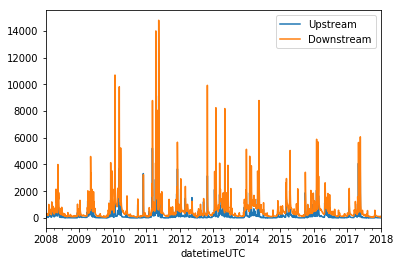

In [5]:
Q.plot()

# Plotting a Flow Duration Chart
Flow duration charts are function included in Hydrofunctions.
We'll use the 'linear' option to scale the X axis.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ea65fb60b8>)

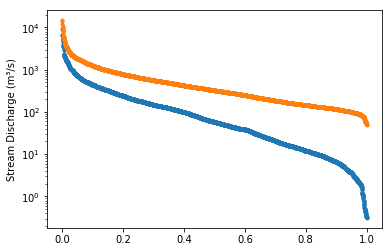

In [6]:
hf.flow_duration(Q, xscale='linear')

# Plotting a Cycleplot Chart
The cycleplot helps to illustrate various natural cycles in your dataset. It plots a single column of data so that the data value is on the Y axis, and time is on the X axis. The time axis is set to show either an annual cycle (shown below), a weekly cycle, or a diurnal cycle (default).

In our example below, the ten years of daily data are plotted over the course of a year, and all of the values within a week are averaged and plotted by week number. The median and mean for each week are shown with lines, while the 20th, 40th, 60th, and 80th percentile are shown with shaded fills.

For our dataset, you can see the lower flows that start occuring around week 25 (early June) and last through the summer to week 45 (start of November). You can also bin values by day ('annual-day') or by month ('annual-month'). The smaller the bins, the greater the variation.

(<Figure size 1008x432 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA660E2860>],
       dtype=object))

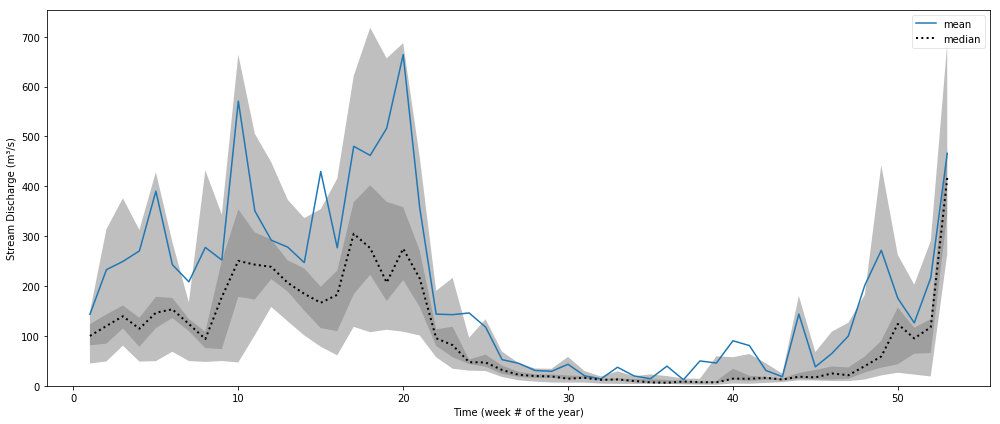

In [7]:
hf.cycleplot(Q.loc[:,'Upstream'], 'annual-week')

# Plotting a histogram
Dataframes have a built-in histogram function.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA660E2EB8>,
      dtype=object)

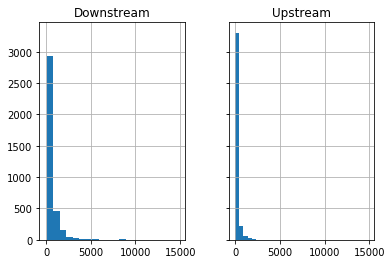

In [8]:
# We'll plot each histogram with 20 bins (default is 10;)
# and we will have both sites share the same scale for the x axis (discharge) and y axis (count)
Q.hist(bins=20, sharex=True, sharey=True)

# Box plots

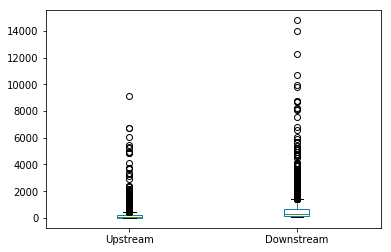

In [11]:
Q.plot.box()